# Кластеризация

Кластеризация - это метод машинного обучения, который включает группировку данных в пространстве признаков. Теоретически, точки, находящиеся в одной группе, должны иметь схожие свойства, в то время как точки в разных группах должны иметь сильно отличающиеся свойства.

Кластеризация является методом **обучения без учителя** и распространенным методом статистического анализа данных, используемым во многих областях. В частности используется при составлении портретов пользователей, поиска аномалий.

В анализе данных часто прибегают к кластеризации, чтобы получить ценную информацию из наших данных, наблюдая, в какие группы попадают точки при применении алгоритма кластеризации.


## Алгоритм K-средних (k-Means)

Cам алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайно (должно быть задано количество кластеров).
2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
3. Производится пересчет центров кластеров по формуле центра масс всех точек принадлежащих кластеру.
4. Пункты 2-3 повторяются до тех пор пока центры кластеров не перестанут меняться (сильно).

![alt text](https://sandipanweb.files.wordpress.com/2016/08/k3.gif?w=676)

![alt text](https://sandipanweb.files.wordpress.com/2016/08/kb.gif?w=676)

![alt text](https://sandipanweb.files.wordpress.com/2016/08/kmeansb.gif?w=676)

![alt text](https://sandipanweb.files.wordpress.com/2016/08/kmeans1.gif?w=676)

![alt text](https://sandipanweb.files.wordpress.com/2016/08/kmeans11.gif?w=676)

# Реализация алгоритма kMeans на Numpy

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Создадим массив из 150 элементов

In [ ]:
X = np.zeros((150, 2))
X.shape

(150, 2)

Заполним массив случайными значениями

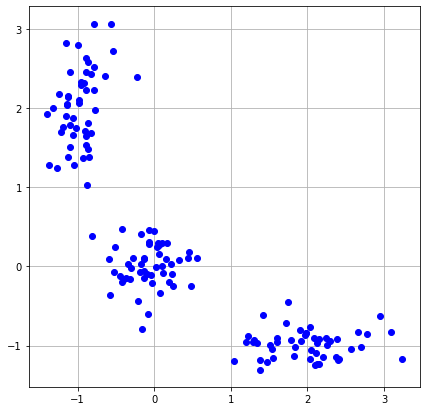

In [ ]:
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(7, 7))
plt.grid()
plt.plot(X[:, 0], X[:, 1], 'bo');

In [ ]:
# Cdist функция для расчета расстояния точками
from scipy.spatial.distance import cdist

# Создадим 3 кластера со случайными координатами
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

In [ ]:
centroids

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696]])

In [ ]:
X[0]

array([0.14901425, 0.09722519])

### ЗАДАНИЕ
Напишите функцию, которая рассчитывает эвклидово расстояние

In [ ]:
def my_cdist(X1, X2):
  return np.sqrt(((X1-X2)**2).sum())

In [ ]:
my_cdist(X[0], centroids[0])

3.650057157148841

In [ ]:
cdist(X, centroids)

array([[ 3.65005716,  1.03108506,  1.40587955],
       [ 1.77614684,  3.74545845,  1.56223909],
       [ 3.67282952,  0.54141895,  1.71230609],
       [ 4.44175854,  2.84977793,  2.38571972],
       [ 0.72385325,  3.65507729,  1.60959118],
       [ 2.80375159,  2.13732326,  0.60628796],
       [ 0.59803316,  3.62704616,  1.70313623],
       [ 2.4856937 ,  2.51295347,  0.57508719],
       [ 3.17802239,  3.18326798,  3.15630286],
       [ 1.68179722,  2.56628953,  1.14866243],
       [ 2.76865674,  1.7911392 ,  1.69007   ],
       [ 3.62845149,  0.84725985,  1.44279719],
       [ 3.25263542,  2.67480082,  1.34012029],
       [ 1.16202513,  3.929907  ,  1.74819246],
       [ 2.12390109,  3.00191801,  0.87633704],
       [ 2.88013011,  4.87395469,  2.81660223],
       [ 3.76257318,  2.83683008,  1.83347387],
       [ 1.32816157,  2.90414811,  1.02668986],
       [ 2.58926049,  1.6529126 ,  0.6808845 ],
       [ 3.12792091,  1.74115716,  0.84213536],
       [ 2.88347971,  3.75368788,  1.884

In [ ]:
n_iterations = 3
for i in range(n_iterations):
    # Расчитываем расстояние между точкой и центроидой
    distances = cdist(X, centroids)
    # Проверяем ближайший центроид точки
    labels = distances.argmin(axis=1)
    # Маркировака точки в соответствии с растроянием
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    cent_history.append(centroids)

In [ ]:
distances

array([[2.12630587, 2.22820561, 0.24617437],
       [2.20016252, 2.33196304, 0.13449972],
       [1.94899926, 2.51295965, 0.35070221],
       [1.9188891 , 2.32936526, 0.56551224],
       [2.42395932, 1.936332  , 0.2968717 ],
       [2.40813619, 1.96284876, 0.266983  ],
       [1.67476792, 2.69529273, 0.61563091],
       [1.96363282, 2.43337857, 0.32972372],
       [2.38149224, 2.09526472, 0.10468876],
       [2.22069974, 2.06922611, 0.372019  ],
       [2.27958005, 2.32105678, 0.16642859],
       [2.31409106, 2.2388491 , 0.08935512],
       [2.01588564, 2.57595575, 0.37773234],
       [2.62953951, 2.41434639, 0.6163631 ],
       [2.78291907, 1.83594217, 0.49283082],
       [2.55944157, 1.80459551, 0.40358335],
       [2.47836709, 2.15064882, 0.22430047],
       [2.28181547, 2.02529411, 0.33809276],
       [2.50335316, 2.03801304, 0.21299626],
       [2.53042398, 2.28289875, 0.39893392],
       [1.88820406, 2.37881661, 0.53058826],
       [2.50631792, 1.80442238, 0.44897533],
       [2.

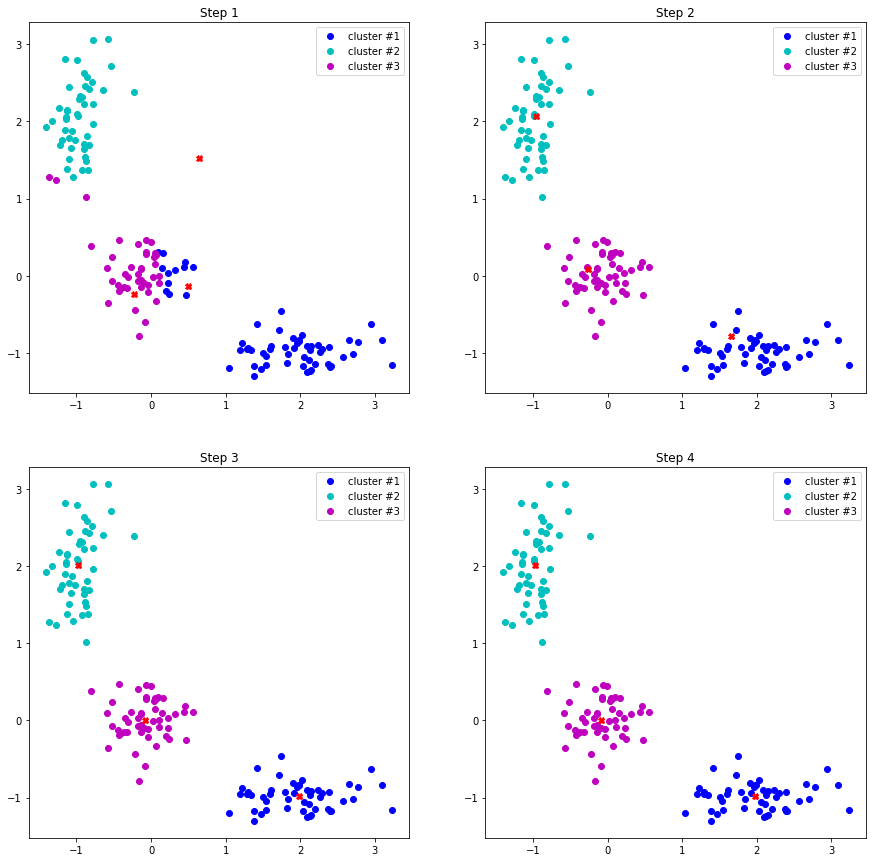

In [ ]:
# Выводим на экран K-means
plt.figure(figsize=(15, 15))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

### Как выбирать число кластеров в k-means?

Иногда число кластеров приходит из задачи (например хотим поделить пользователей на 3 сегмента по доходу).

Если можем визуализировать выборку и определить число кластеров визуально, то так и поступаем.

Но если по какой-то причине не можем визуализировать выборку, то нужно вычислять значения инерции для всех значений числа кластеров после завершения кластеризаций

![alt text](https://i.ibb.co/0hmHdgR/Screen-Shot-2020-03-06-at-12-51-46-AM.png)

![alt text](https://rnowling.github.io/images/bps-multinomial-segmentation/pmf_kmeans_inertia.png)

# Реализация с помощью sklearn

Создадим выборку из 3 кластеров

In [ ]:
np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) + np.array([10,1])
X3 = np.random.randn(100,2) + np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Все координаты хранятся теперь матрице `X` с двумя столбцами (`x` и `y` координаты).

**Задание**

Нарисуйте эту выборку на плоскости с помощью `plt.scatter`

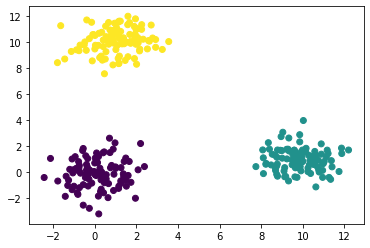

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

**Задание**

Сделайте кластеризацию данных на 3 кластера с помощью kMeans

Используйте документацию с сайта sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
kmeans.predict([[0, 0], [12, 3]])

array([2, 0], dtype=int32)

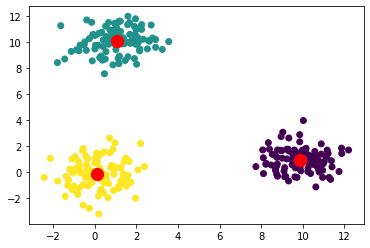

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='r')

In [ ]:
kmeans.cluster_centers_

array([[ 9.84750634,  0.92377026],
       [ 1.05517745, 10.08097046],
       [ 0.130869  , -0.12329549]])

In [ ]:
from sklearn.cluster import KMeans
l = []
def train_and_plot_kmeans(N, X):
  """
    N - Число кластеров
    X - Массив с объектами
  """
  kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
  plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='r')
  plt.show()
  l.append(kmeans.inertia_)

**Задание**

Посмотрите, что будет происходить, если мы не угадали с числом кластеров.

Для этого cделайте кластеризацию данных на N кластеров с помощью kMeans, где N варьируется от 1 до 8. Постройте получившиеся результаты кластеризации

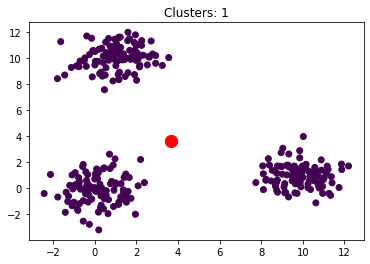

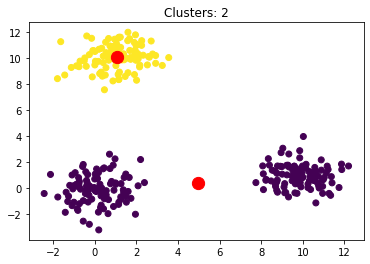

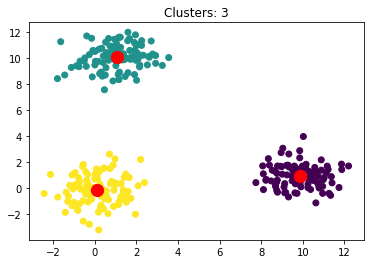

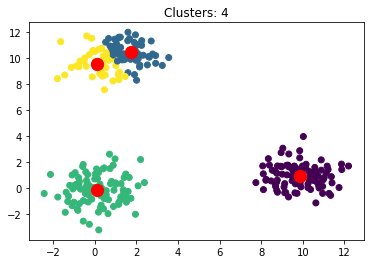

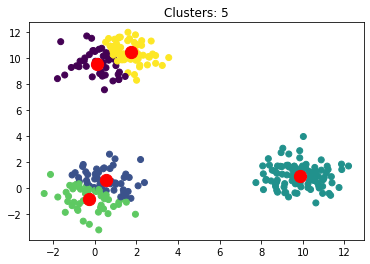

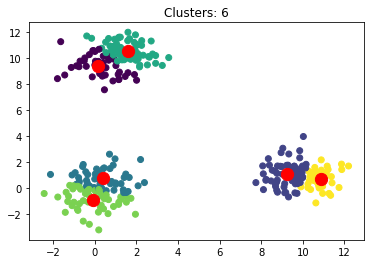

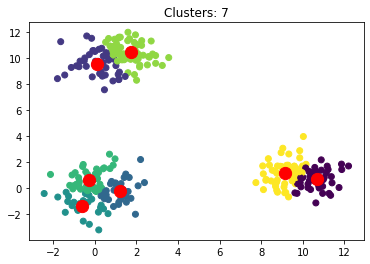

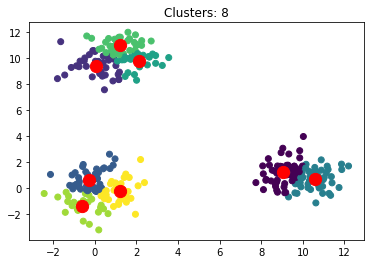

In [ ]:
for i in range(8):
  plt.title('Clusters: {:}'.format(i + 1))
  train_and_plot_kmeans(i+1, X)

### И в конце постройте график инерции от количества кластеров

In [ ]:
l

[12650.962284707708,
 5371.42699190649,
 595.957597166124,
 512.8392265135847,
 440.4279361913252,
 374.65912179891063,
 326.85056868434356,
 291.1894352428069]

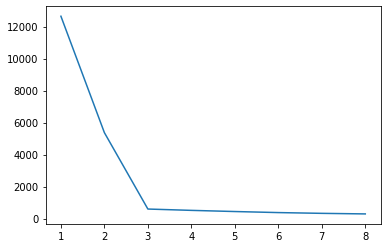

In [ ]:
plt.plot(range(1,9), l)

Как мы возможно увидим, k-means обязательно пытается отдать каждому кластеру какие-то объекты и, как большинство алгоритмов кластеризации зависит от заданного числа кластеров. Есть огромное количество вариаций как выбирать количество кластеров автоматически, например ввести вероятностный подход к выбору числа кластеров.

Один из главных недостатков k-means является случайная инициализация центров кластеров, что может привести к различным результатам кластеризации.

Главным же достоинством является скорость алгоритма. На каждой итерации требуется пересчет только расстояний до центров кластеров.

# EM-алгоритм (expactation-maximization algorithm)

Что происходит по математике: EM-алгоритм максимизирует правдоподобие выборки, описывая каждый кластер гауссовым (нормальным) распределением.

Описание работы EM-алгоритма:
https://www2.cs.duke.edu/courses/fall07/cps271/EM.pdf

![alt text](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)

### EM-алгоритм работает хорошо, но долго. На практике часто применяют именно его, когда хотят добиться хорошего качества кластеризации

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/2880px-ClusterAnalysis_Mouse.svg.png)

# Сравнение работы разных алгоритмов кластеризации

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### Подробное сравнение работы и описание разных алгоритмов кластеризации можно найти на официальной [странице с документацией SKlearn](https://scikit-learn.org/stable/modules/clustering.html)